<a href="https://colab.research.google.com/github/Samuel-Wamwitha/Core-IP-Week-6/blob/master/Samuel_Wamwitha_Core_IP_Week_6_11_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Week 6 IP : Football Predictions

## 1. Defining the Question

### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### b) Defining the Metric for Success

i)  Creating a model that will predict the scores of Home 
teams.

ii)  Creating a model that will predict the scores of Away teams

iii) Creating a model that will predict whether the Home team will win, draw or lose.

### c) Data Relevance

The Datasets were relevant to solving the research problem since the provided information about football matches played, the ranks of the teams and the tournaments played.

## 2. Reading the Data

In [143]:
# Loading the Fifa dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fifa = pd.read_csv("fifa_ranking.csv")
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,8/8/1993


In [144]:
# Loading the Results dataset
results = pd.read_csv("results.csv")
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [145]:
# Changing the format of the dates columns
fifa['rank_date'] = pd.to_datetime(fifa['rank_date'])
results['date'] = pd.to_datetime(results['date'])

In [146]:
# Splitting the date column to get Year column
fifa['year'] = fifa['rank_date'].dt.year
results['year'] = results['date'].dt.year

In [147]:
# Merged datasets on Home team column
home = pd.merge(right = fifa, left = results, right_on=['rank_date', 'country_full', 'year'], left_on = ['date', 'home_team', 'year'])
home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [148]:
# Merged datasets on Away team column
away = pd.merge(right = fifa, left = results, right_on=['rank_date', 'country_full', 'year'], left_on = ['date', 'away_team', 'year'])
away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,14,Mexico,MEX,0.0,42,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,94,Venezuela,VEN,0.0,4,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,86,Sierra Leone,SLE,0.0,16,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [149]:
# Merging the home dataset and away dataset
df = pd.merge(right = away, left = home, right_on=['date', 'home_team', 'away_team', 'year', 'tournament'], left_on =['date', 'home_team', 'away_team', 'year', 'tournament'])
df.head()

,date,home_team,away_team,home_score_x,away_score_x,tournament,city_x,country_x,neutral_x,year,rank_x,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,home_score_y,away_score_y,city_y,country_y,neutral_y,rank_y,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,3,1,La Paz,Bolivia,False,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1,1,Maceió,Brazil,False,14,Mexico,MEX,0.0,42,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5,0,Quito,Ecuador,False,94,Venezuela,VEN,0.0,4,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,1,0,Conakry,Guinea,False,86,Sierra Leone,SLE,0.0,16,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1,3,Asunción,Paraguay,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [150]:
# Getting the Final dataset
df = df[['home_team', 'home_score_x', 'away_team', 'away_score_x', 'year', 'rank_x', 'rank_y', 'tournament']]
df

,home_team,home_score_x,away_team,away_score_x,year,rank_x,rank_y,tournament
0,Bolivia,3,Uruguay,1,1993,59,22,FIFA World Cup qualification
1,Brazil,1,Mexico,1,1993,8,14,Friendly
2,Ecuador,5,Venezuela,0,1993,35,94,FIFA World Cup qualification
3,Guinea,1,Sierra Leone,0,1993,65,86,Friendly
4,Paraguay,1,Argentina,3,1993,67,5,FIFA World Cup qualification
...,...,...,...,...,...,...,...,...
866,England,2,Costa Rica,0,2018,12,23,Friendly
867,Uruguay,3,Uzbekistan,0,2018,14,95,Friendly
868,Portugal,3,Algeria,0,2018,4,66,Friendly
869,Iceland,2,Ghana,2,2018,22,47,Friendly


In [151]:
# Changing columns of the Final dataset
df = df.rename(columns = {'home_team' : 'Home_team', 'away_team' : 'Away_team', 'home_score_x' : 'Home_team_score', 'away_score_x' : 'Away_team_score', 'year' : 'Year', 'rank_x' : 'Home_team_rank', 'rank_y' : 'Away_team_rank', 'tournament' : 'Tournament'})
df

,Home_team,Home_team_score,Away_team,Away_team_score,Year,Home_team_rank,Away_team_rank,Tournament
0,Bolivia,3,Uruguay,1,1993,59,22,FIFA World Cup qualification
1,Brazil,1,Mexico,1,1993,8,14,Friendly
2,Ecuador,5,Venezuela,0,1993,35,94,FIFA World Cup qualification
3,Guinea,1,Sierra Leone,0,1993,65,86,Friendly
4,Paraguay,1,Argentina,3,1993,67,5,FIFA World Cup qualification
...,...,...,...,...,...,...,...,...
866,England,2,Costa Rica,0,2018,12,23,Friendly
867,Uruguay,3,Uzbekistan,0,2018,14,95,Friendly
868,Portugal,3,Algeria,0,2018,4,66,Friendly
869,Iceland,2,Ghana,2,2018,22,47,Friendly


## 3. Checking the Data

In [152]:
# Determining the number of records
df.shape

(871, 8)

In [153]:
# Previewing the top of the dataset
df.head()

,Home_team,Home_team_score,Away_team,Away_team_score,Year,Home_team_rank,Away_team_rank,Tournament
0,Bolivia,3,Uruguay,1,1993,59,22,FIFA World Cup qualification
1,Brazil,1,Mexico,1,1993,8,14,Friendly
2,Ecuador,5,Venezuela,0,1993,35,94,FIFA World Cup qualification
3,Guinea,1,Sierra Leone,0,1993,65,86,Friendly
4,Paraguay,1,Argentina,3,1993,67,5,FIFA World Cup qualification


In [154]:
# Previewing the bottom of our dataset
df.tail()

,Home_team,Home_team_score,Away_team,Away_team_score,Year,Home_team_rank,Away_team_rank,Tournament
866,England,2,Costa Rica,0,2018,12,23,Friendly
867,Uruguay,3,Uzbekistan,0,2018,14,95,Friendly
868,Portugal,3,Algeria,0,2018,4,66,Friendly
869,Iceland,2,Ghana,2,2018,22,47,Friendly
870,India,1,New Zealand,2,2018,97,120,Intercontinental Cup


In [155]:
# Checking whether each column has an appropriate datatype
df.dtypes

Home_team          object
Home_team_score     int64
Away_team          object
Away_team_score     int64
Year                int64
Home_team_rank      int64
Away_team_rank      int64
Tournament         object
dtype: object

In [156]:
# Checking for duplicates
df.duplicated().sum()

0

## 4. Tidying the Dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


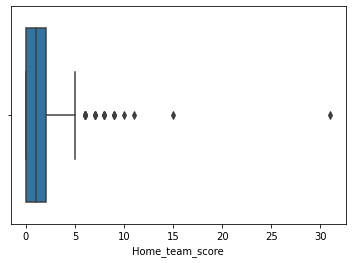

In [157]:
# Checking for Outliers
sns.boxplot(df['Home_team_score'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


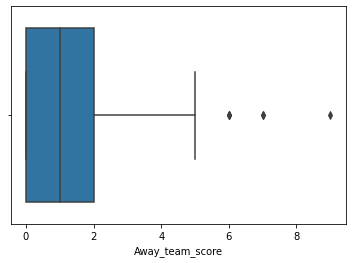

In [158]:
sns.boxplot(df['Away_team_score'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


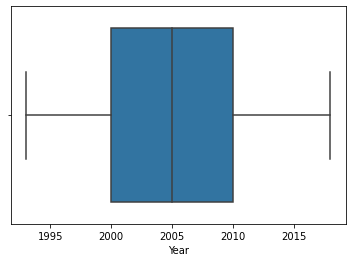

In [159]:
sns.boxplot(df['Year'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


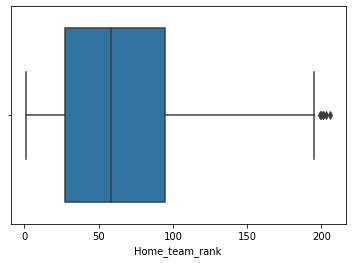

In [160]:
sns.boxplot(df['Home_team_rank'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


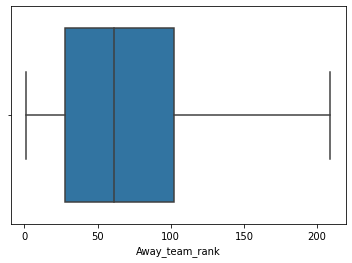

In [161]:
sns.boxplot(df['Away_team_rank'])

In [162]:
# Checking for missing values
df.isnull().sum()

Home_team          0
Home_team_score    0
Away_team          0
Away_team_score    0
Year               0
Home_team_rank     0
Away_team_rank     0
Tournament         0
dtype: int64

In [163]:
# Dealing with outliers in the home team score
ht, ht1 = np.percentile(df.Home_team_score, [25, 75]) 
iqr = ht1 - ht
upper_bound = ht1 + (1.5 * iqr)
df = df[~(df.Home_team_score>upper_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


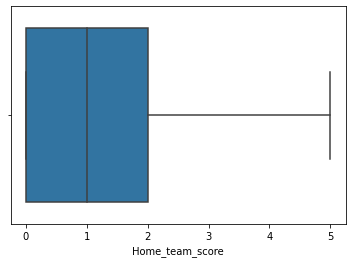

In [164]:
sns.boxplot(df['Home_team_score'])

In [165]:
# Dealing with outliers in the Away team score
at, at1 = np.percentile(df.Away_team_score, [25, 75]) 
iqr = at1 - at
upper_bound = at1 + (1.5 * iqr)
df = df[~(df.Away_team_score>upper_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


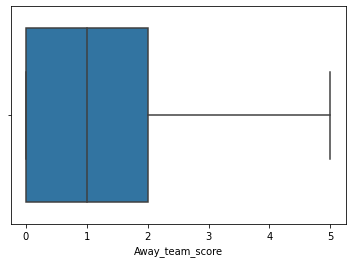

In [166]:
sns.boxplot(df['Away_team_score'])

In [167]:
# # Dealing with outliers in the Home team rank
htr, htr1 = np.percentile(df.Home_team_rank, [25, 75]) 
iqr = htr1 - htr
upper_bound = htr1 + (1.5 * iqr)
df = df[~(df.Home_team_rank>upper_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


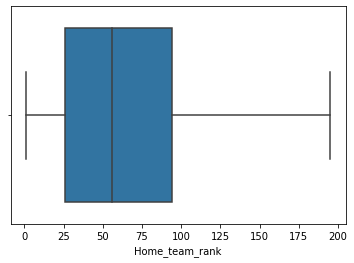

In [168]:
sns.boxplot(df['Home_team_rank'])

## 5. Exploratory Analysis

### Univariate Analysis

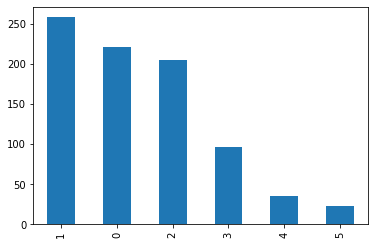

In [169]:
# Plotting value counts of Home team scores
df['Home_team_score'].value_counts().plot(kind='bar')

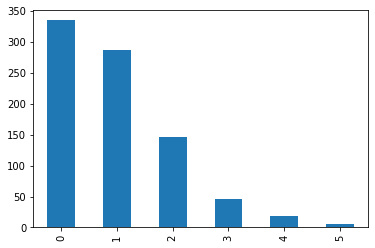

In [170]:
# Plotting value counts of Away team scores
df['Away_team_score'].value_counts().plot(kind='bar')

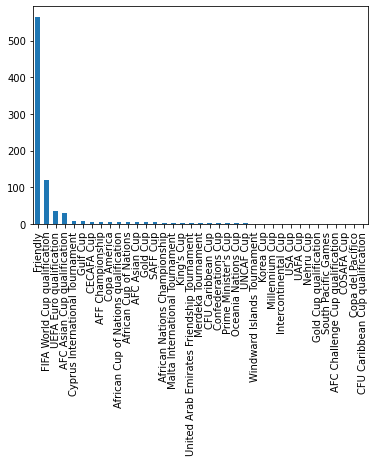

In [171]:
# Plotting value counts of Tournaments
df['Tournament'].value_counts().plot(kind='bar')

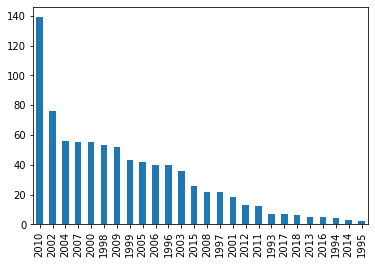

In [172]:
# Plotting value counts of games played in each Year
df['Year'].value_counts().plot(kind='bar')

#### Central Tendency

In [173]:
# Getting the mean of Home team scores
df.Home_team_score.mean()

1.4469606674612634

In [174]:
# Getting the median of Home team scores
df.Home_team_score.median()

1.0

In [175]:
# Getting the mode of Home team scores
df.Home_team_score.mode()

0    1
dtype: int64

In [176]:
# Getting the mean of Away team scores
df.Away_team_score.mean()

0.9773539928486293

In [177]:
# Getting the median of Away team scores
df.Away_team_score.median()

1.0

In [178]:
# Getting the mode of Away team scores
df.Away_team_score.mode()

0    0
dtype: int64

#### Dispersion

In [179]:
# Getting the Standard deviation of Home team scores
df.Home_team_score.std()

1.259517347846028

In [180]:
# Getting the Maximum value of Home team scores
df.Home_team_score.max()

5

In [181]:
# Getting the Minimum value of Home team scores
df.Home_team_score.min()

0

In [182]:
# Getting the standard deviation of Away team scores
df.Away_team_score.std()

1.045829155622245

In [183]:
# Getting the Maximum value of Away team scores
df.Away_team_score.max()

5

In [184]:
# Getting the Minimum value of Away team scores
df.Away_team_score.min()

0

Observations

From our Analysis:

- Most Home teams scored 1 goal
- Most Away teams did not score (0 score)
- Most games played were Friendlies
- Most games were played in the Year 2010
- Maximum number of goals score by both Home and Away teams was 5

### Bivariate Analysis

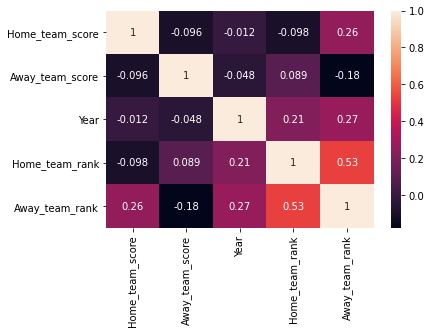

In [185]:
# Getting the correlations of the dataset
plt.subplots()
sns.heatmap(df.corr(),annot=True)

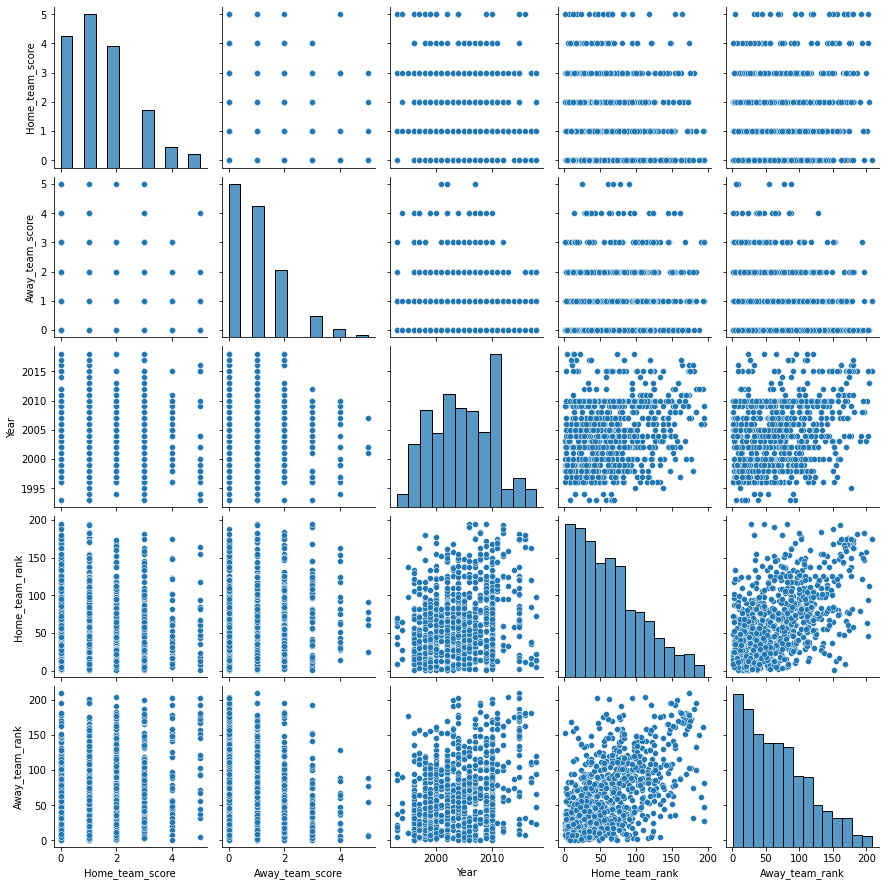

In [186]:
# Plotting the Pairplot
sns.pairplot(df)

Observations

From our analysis:

 - Home team rank and Away team rank have a moderate correlation of 0.53. The scatter plot between the two also shows a positive correlation.

## 6. Implementing the solution

### Polynomial Regression

#### Multicollinearity

In [187]:
# Checking for unique values in the Tournament column
df.Tournament.unique()

array(['FIFA World Cup qualification', 'Friendly', 'Merdeka Tournament',
       'South Pacific Games', 'African Cup of Nations',
       'CFU Caribbean Cup qualification', 'Copa América',
       'UEFA Euro qualification',
       'United Arab Emirates Friendship Tournament', 'UNCAF Cup',
       'Korea Cup', 'Gold Cup', 'AFC Asian Cup qualification', 'USA Cup',
       'Millennium Cup', "King's Cup", 'CFU Caribbean Cup', 'Gulf Cup',
       'Cyprus International Tournament',
       'Malta International Tournament', 'UAFA Cup', 'AFF Championship',
       'SAFF Cup', 'Gold Cup qualification', "Prime Minister's Cup",
       'Confederations Cup', 'AFC Asian Cup', 'Nehru Cup', 'COSAFA Cup',
       'CECAFA Cup', 'AFC Challenge Cup qualification',
       'African Cup of Nations qualification', 'Copa del Pacífico',
       'Oceania Nations Cup', 'African Nations Championship',
       'Windward Islands Tournament', 'Intercontinental Cup'],
      dtype=object)

In [188]:
# Label encoding the Tournament column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Tournament'] = le.fit_transform(df['Tournament'])
df.head()

,Home_team,Home_team_score,Away_team,Away_team_score,Year,Home_team_rank,Away_team_rank,Tournament
0,Bolivia,3,Uruguay,1,1993,59,22,15
1,Brazil,1,Mexico,1,1993,8,14,16
2,Ecuador,5,Venezuela,0,1993,35,94,15
3,Guinea,1,Sierra Leone,0,1993,65,86,16
4,Paraguay,1,Argentina,3,1993,67,5,15


In [189]:
# Getting the correlations of the Independent variables
independent = df[['Home_team_rank', 'Away_team_rank', 'Tournament']]

correlation = independent.corr()
correlation

,Home_team_rank,Away_team_rank,Tournament
Home_team_rank,1.000000,0.533732,-0.087025
Away_team_rank,0.533732,1.000000,-0.073525
Tournament,-0.087025,-0.073525,1.000000


In [190]:
# Getting the VIFs of the Independent variables
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,Home_team_rank,Away_team_rank,Tournament
Home_team_rank,1.402850,-0.743791,0.067396
Away_team_rank,-0.743791,1.399793,0.038191
Tournament,0.067396,0.038191,1.008673


The VIF scores of the Independent variables are less than 5 hence our variables are not correlated.

#### Model 1 : Home team score prediction

In [191]:
# Performing Data preprocessing
X = df.iloc[:, 5:8].values
y = df.iloc[:, 1].values

print(X)
print(y)

[[ 59  22  15]
 [  8  14  16]
 [ 35  94  15]
 ...
 [  4  66  16]
 [ 22  47  16]
 [ 97 120  20]]
[3 1 5 1 1 0 1 1 5 3 2 1 3 3 1 2 0 0 3 4 1 3 0 1 2 2 4 0 0 2 0 2 0 1 0 5 0
 2 2 0 2 0 2 2 0 1 1 1 0 3 1 1 0 1 5 2 1 3 1 3 2 2 0 0 1 0 0 1 3 1 1 0 2 1
 1 1 4 0 1 0 1 2 2 4 0 3 1 0 3 1 1 1 1 0 5 1 1 2 1 3 1 2 4 0 0 2 0 1 4 1 5
 0 2 1 0 5 1 1 2 3 1 2 2 2 0 2 2 0 2 2 1 3 1 2 2 2 0 2 2 0 3 2 3 0 2 0 3 1
 0 0 1 1 4 1 2 0 1 5 5 2 0 3 0 1 3 2 0 0 1 0 2 2 1 2 2 0 4 0 1 1 0 4 5 2 1
 2 1 0 2 1 1 0 1 2 3 2 0 0 0 0 3 0 2 3 0 1 0 0 5 2 2 0 2 3 1 5 1 2 0 0 1 1
 1 0 1 0 2 0 2 2 0 1 0 1 1 1 1 4 2 3 0 3 1 1 0 1 1 0 3 1 2 2 2 0 0 3 1 1 2
 0 1 2 1 1 2 0 1 2 3 0 4 0 0 0 2 1 1 2 3 1 1 0 0 1 1 1 1 2 2 3 1 0 1 0 0 0
 2 3 2 2 2 1 0 1 1 1 0 1 0 2 2 0 0 1 1 0 1 1 0 5 3 2 2 0 1 2 0 0 1 0 2 0 1
 3 3 0 3 1 2 0 2 0 0 0 0 0 0 2 0 1 2 2 2 0 0 2 2 2 2 0 1 1 0 1 2 5 1 2 1 0
 2 2 1 5 3 1 1 1 2 1 2 1 3 3 2 2 1 1 1 4 4 0 1 0 3 4 5 4 1 4 3 5 3 3 3 2 1
 1 2 2 3 2 1 2 1 0 2 4 2 2 2 3 1 4 3 1 0 2 1 4 1 0 1 1 0 0 1 1 2 0 2 0 3 3
 3 2

In [192]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fitting Linear Regression model to the dataset
reg_line = LinearRegression()
reg_line.fit(X,y)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

# Fit Linear to Polynomial
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Cross validation

In [193]:
from sklearn.model_selection import KFold
from sklearn import metrics

folds = KFold(n_splits=5)
# The following code shows the number of folds used.
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = []
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# We will set up the train and test based on the split determined by KFold 
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  poly_reg = PolynomialFeatures(degree = 4) 
  poly_reg.fit(X_train, y_train)

  y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1
print(' ')
np.mean(RMSES)

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.2624864347937745

Training model 2
Model 2 Root Mean Squared Error: 1.0747465153065618

Training model 3
Model 3 Root Mean Squared Error: 1.1031048218986113

Training model 4
Model 4 Root Mean Squared Error: 1.1015065382831886

Training model 5
Model 5 Root Mean Squared Error: 1.1839072483874074
 


1.1451503117339086

In [194]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9514842729176421
Mean Squared Error: 1.4016363727842422
Root Mean Squared Error: 1.1839072483874074


The Original RMSE is 0.8626 which is slighlty less than the RMSE found after performing cross validation which is 0.9802

Residual test

In [195]:
residuals = np.subtract(y_pred, y_test)
print(pd.DataFrame(residuals).describe())
residuals.mean()

                0
count  167.000000
mean     0.100507
std      1.183181
min     -3.137056
25%     -0.597416
50%      0.301950
75%      0.820040
max      2.537585


0.10050733239843639

The residual mean is close to 0, our data is fairly correct.

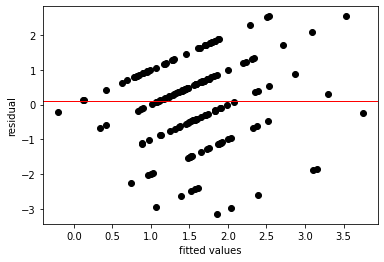

In [196]:
# Plotting a residual plot
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Heteroskedasticity Test

In [197]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

68.0995442036881
362.4879540958106
the variances are homogeneous!


#### Model 2 : Away team score prediction

In [198]:
# Perform Data preprocessing
X = df.iloc[:, 5:8].values
y = df.iloc[:, 3].values

print(X)
print(y)

[[ 59  22  15]
 [  8  14  16]
 [ 35  94  15]
 ...
 [  4  66  16]
 [ 22  47  16]
 [ 97 120  20]]
[1 1 0 0 3 1 2 0 0 4 1 0 1 3 2 1 4 1 1 2 2 1 0 0 0 0 1 0 3 0 2 0 1 2 0 0 0
 3 0 2 2 0 2 1 2 0 3 2 1 0 3 0 3 0 0 0 2 0 0 0 0 1 3 4 1 0 4 3 1 0 0 3 1 2
 1 1 0 2 1 1 1 1 2 1 2 0 0 2 1 0 0 1 3 0 2 1 2 2 0 2 0 1 1 3 0 1 0 0 0 1 1
 0 3 0 0 1 1 2 0 1 1 2 0 2 0 2 0 1 1 0 0 1 1 0 0 1 1 2 2 2 4 2 0 0 0 1 1 1
 0 1 0 2 0 0 0 0 1 4 1 1 1 0 1 0 2 1 2 0 1 1 0 0 0 0 0 1 1 0 2 1 1 2 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 0 2 1 0 0 0 2 0 0 0 0 2 0 1 0 2 1 0 0 1 0 1 1 2 2 0
 1 4 2 2 0 0 0 0 0 0 0 5 1 0 0 3 1 1 2 1 0 2 2 1 0 0 4 0 1 2 0 3 0 0 1 4 2
 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 5 1 1 1 3 0 0 5 0 2 1 2 0 0 1 1 3 0 1 2 1 2
 1 3 0 2 0 3 0 0 1 1 2 3 0 0 1 1 1 1 0 0 0 0 4 1 0 3 2 0 1 0 0 0 0 0 2 1 1
 1 1 0 3 1 1 0 0 1 1 0 0 1 3 0 1 0 1 0 2 1 1 0 0 1 1 2 0 2 2 0 0 0 1 0 0 0
 2 0 0 0 1 1 3 1 1 4 0 1 0 0 1 0 0 1 1 0 0 0 2 0 3 2 0 0 0 0 0 0 0 0 0 2 1
 1 2 0 2 0 2 2 2 1 1 3 1 2 0 1 1 1 1 0 3 1 2 1 2 0 2 1 1 0 0 1 0 1 2 2 0 1
 2 0

In [199]:
# Split the dataset into train and test sets
X_train_1, y_train_1, X_test_1, y_test_1 = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fitting Linear Regression model to the dataset
reg_line = LinearRegression()
reg_line.fit(X,y)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

# Fit Linear to Polynomial
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Cross Validation

In [200]:
from sklearn.model_selection import KFold
from sklearn import metrics

folds = KFold(n_splits=5)
# The following code shows the number of folds used.
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = []
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# We will set up the train and test based on the split determined by KFold 
  X_train_1, X_test_1 = X[train_index], X[test_index]
  y_train_1, y_test_1 = y[train_index], y[test_index]
  
  poly_reg = PolynomialFeatures(degree = 4) 
  poly_reg.fit(X_train_1, y_train_1)

  y_pred_1 = pol_reg.predict(poly_reg.fit_transform(X_test_1))

  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_1))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1
print(' ')
np.mean(RMSES)

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.9727741046552404

Training model 2
Model 2 Root Mean Squared Error: 1.1102182133585226

Training model 3
Model 3 Root Mean Squared Error: 0.9870506233327968

Training model 4
Model 4 Root Mean Squared Error: 0.9686191224726463

Training model 5
Model 5 Root Mean Squared Error: 0.8625844098521419
 


0.9802492947342696

In [201]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, y_pred_1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, y_pred_1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_1)))

Mean Absolute Error: 0.686464771322182
Mean Squared Error: 0.7440518641199679
Root Mean Squared Error: 0.8625844098521419


The Original RMSE is 0.8626 which is slighlty less than the RMSE found after performing cross validation which is 0.9802

Residual Test

In [202]:
residuals = np.subtract(y_pred_1, y_test_1)

# Let's describe our residual:
print(pd.DataFrame(residuals).describe())
residuals.mean()

                0
count  167.000000
mean     0.096948
std      0.859697
min     -2.707347
25%     -0.309497
50%      0.081644
75%      0.715492
max      1.580499


0.09694765605378217

The residual mean is close to 0, our data is fairly correct.

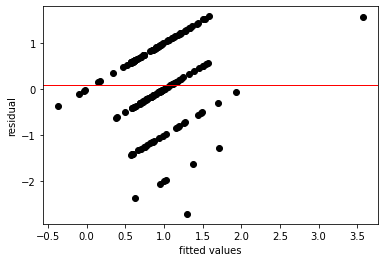

In [203]:
# Plotting a residual plot
import matplotlib.pyplot as plt

plt.scatter(y_pred_1, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Heteroskedasticity Test

In [204]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_1, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_1)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

83.65670674592482
the variances are homogeneous!


### Logistic Regression

In [205]:
# Creating a column for Status
def s(row):
  if row['Home_team_score'] > row['Away_team_score']:
    status = 'Win'
  elif row['Home_team_score'] == row['Away_team_score']:
    status = 'Draw'
  else:
    status = 'Lose'
  return status

In [206]:
df['Status'] = df.apply(s, axis=1)
df.head()

,Home_team,Home_team_score,Away_team,Away_team_score,Year,Home_team_rank,Away_team_rank,Tournament,Status
0,Bolivia,3,Uruguay,1,1993,59,22,15,Win
1,Brazil,1,Mexico,1,1993,8,14,16,Draw
2,Ecuador,5,Venezuela,0,1993,35,94,15,Win
3,Guinea,1,Sierra Leone,0,1993,65,86,16,Win
4,Paraguay,1,Argentina,3,1993,67,5,15,Lose


In [207]:
# Label encoding the Status column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])
df.head()

,Home_team,Home_team_score,Away_team,Away_team_score,Year,Home_team_rank,Away_team_rank,Tournament,Status
0,Bolivia,3,Uruguay,1,1993,59,22,15,2
1,Brazil,1,Mexico,1,1993,8,14,16,0
2,Ecuador,5,Venezuela,0,1993,35,94,15,2
3,Guinea,1,Sierra Leone,0,1993,65,86,16,2
4,Paraguay,1,Argentina,3,1993,67,5,15,1


In [208]:
# Splitting our dataset
X_L = df[['Home_team_score', 'Away_team_score', 'Home_team_rank', 'Away_team_rank']]
y_L = df['Status']

from sklearn.model_selection import train_test_split
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X_L, y_L, test_size = .3, random_state=25)

In [209]:
# Fitting our model
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train_L, y_train_L)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
# Making a prediction
log_pred = LogReg.predict(X_test_L)

In [211]:
LogReg.score(X_test_L, y_test_L)

1.0

In [212]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_L, log_pred)
confusion_matrix

# The results from the confusion matrix show that 62, 66, and 124 are the number of correct predictions there are no incorrect predictions. 

array([[ 62,   0,   0],
       [  0,  66,   0],
       [  0,   0, 124]])

#### Hyperparameter Tuning

In [213]:
# Scaling our Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train_L = feature_scaler.fit_transform(X_train_L)
X_test_L = feature_scaler.transform(X_test_L)

In [214]:
# Training the data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [215]:
# Performing cross validation
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train_L, y=y_train_L, cv=5)

In [216]:
# Getting the accuracies of all folds
print(all_accuracies.mean())

0.9915109372736491


In [217]:
# Specifying parameters and distributions to sample from
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [218]:
# Instantiating RandomizedSearchCV object 
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5)

In [219]:
# Calling the fit method
random_sr.fit(X_train_L, y_train_L)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [220]:
# Checking the parameters that return the highest accuracy
best_parameters = random_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 3}


In [221]:
# Finding the obtained accuracy
best_result = random_sr.best_score_
print(best_result)

# The accuracy achieved after Hyperparameter tuning is 0.9881 or 98.81% which is slightly below the accuracy found in Cross validation of 0.9915 or 99.15%. 

0.9915109372736491


## 7. Challenging the solution

Reviewing the Solution i think having more data on the football matches would improve our models.

## 8. Follow up Questions

### a) Did we have the right data?

The data was right for analysis and building the models.

### b). Do we need other data to answer our question?

The data was adequate enough to answer our question.

### c). Did we have the right question?

The questions asked were the right questions for the data provided.